## RNN to predict Google Stock Prices


Machine Learning -  Homework #4 - University of Memphis. Fall 2022  <br>
Last updated - Nov 15, 2022  <br>
Author Bereket Kebede, Graduate Student <br>


## Getting Started 
----

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
training_set = pd.read_csv("Google_Stock_Price_Trainset.csv")

In [6]:
training_set = training_set.iloc[:,1:2].values

# Feature Scaling + Normalization, since LSTM Several Sigmoid Activation function
# Sigmoid 0 and 1, as is the case in Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() # default is 0,1

In [7]:
# Fitting to training_set, scale training set, 
# transform we'll apply normalizationjust need min and max for normalization
training_set = sc.fit_transform(training_set)

# Getting the inputs and the outputs, y_train is output, x_train is the input
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [8]:
# Reshaping inputs, input has a certain format (2D array, features)
# Changing the format of X_train into a 3D array, with a timestep
# Keras Documentation - why reshape? - 3D tensor with shape (batch_size, timesteps)
# time steps different between output and input time, input_dim dimension of input feature
X_train = np.reshape(X_train, (1257, 1, 1))

# Part 2 - Building the RNN

# Importing the keras libs and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Epoch 1/200
40/40 [==============================] - 1s 2ms/step - loss: 0.0552
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0530
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0489
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0469
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0449
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0430
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0412
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0394
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0375
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0340
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 2ms/step - loss: 3.0191e-04
Epoch 100/200
40/40 [==============================] - 0s 1ms/step - loss: 3.0327e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0241e-04
Epoch 102/200
40/40 [==============================] - 0s 1ms/step - loss: 3.0177e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0474e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0416e-04
Epoch 105/200
40/40 [==============================] - 0s 1ms/step - loss: 3.0300e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0286e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0106e-04
Epoch 108/200
40/40 [==============================] - 0s 1ms/step - loss: 3.0196e-04
Epoch 109/200
40/40 [==============================] - 0s 1ms/step - loss: 3.0287e-04
Epoch 110/200
40/40 [==============================] - 0s 1ms/step -

40/40 [==============================] - 0s 1ms/step - loss: 3.0384e-04
Epoch 195/200
40/40 [==============================] - 0s 2ms/step - loss: 3.0199e-04
Epoch 196/200
40/40 [==============================] - 0s 1ms/step - loss: 3.0174e-04
Epoch 197/200
40/40 [==============================] - 0s 1ms/step - loss: 3.0090e-04
Epoch 198/200
40/40 [==============================] - 0s 1ms/step - loss: 3.0221e-04
Epoch 199/200
40/40 [==============================] - 0s 1ms/step - loss: 3.0160e-04
Epoch 200/200
1/1 [==============================] - 0s 171ms/step


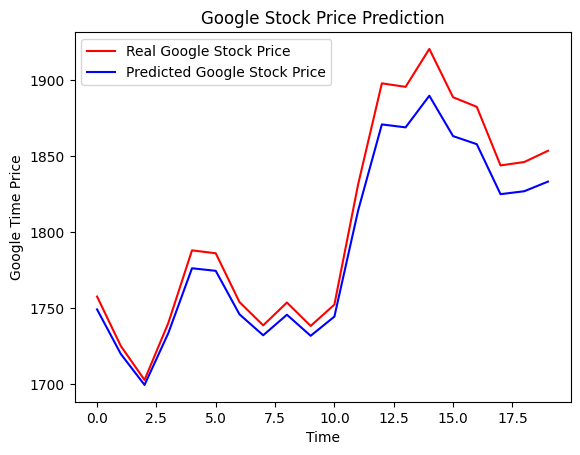

In [9]:
# Initialising the RNN
# predicting a continuous outcome, regression model
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
# use the mean square error
# regression won't be binary cross entropy, MSE for regression
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Trainign set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
test_set = pd.read_csv("Google_Stock_Price_Testset.csv")
real_stock_price = test_set.iloc[:,1:2].values

# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

In [11]:
# Part 4 - Evaluating the RNN
# Evaluate of the RNN - learning to evaluate regression models
# Root Mean Square Error (RMSE)

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

17.025347038008377
